In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

In [2]:
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=0)

In [3]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)
colormap = plt.cm.get_cmap('viridis', len(y_pred))

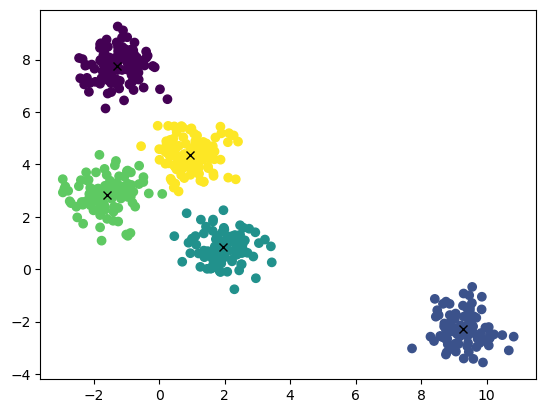

In [4]:
plt.scatter(X[:,0],X[:,1], c=y_pred, cmap=colormap)
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'kx')
plt.plot()
plt.show()

#### hard clustering

In [5]:
X_new = np.array([[-2, 7], [-2, 1], [2, 3], [3, 1], [8, -1]])
y_new_pred = kmeans.predict(X_new)
y_new_pred

array([0, 3, 4, 2, 1], dtype=int32)

#### soft clustering
each instance is given a similarity score for each cluster

In [6]:
kmeans.transform(X_new)

array([[ 1.0453632 , 14.61225879,  7.32376875,  4.1670454 ,  3.9570275 ],
       [ 6.79595192, 11.75647483,  3.95726993,  1.89132371,  4.47731859],
       [ 5.77862906,  8.99931366,  2.16529242,  3.61493792,  1.72102724],
       [ 7.99892863,  7.09256396,  1.05906391,  4.96948619,  3.93945271],
       [12.75976026,  1.81468762,  6.3185478 , 10.35464919,  8.85748075]])

In [7]:
def cluster_inertia_qty(x, y, a, b):
    inertia_scores = []
    for i in range(a,b):
        model = KMeans(n_clusters=i, random_state=42)
        model.fit(x)
        inertia_scores.append(model.inertia_)
    return inertia_scores


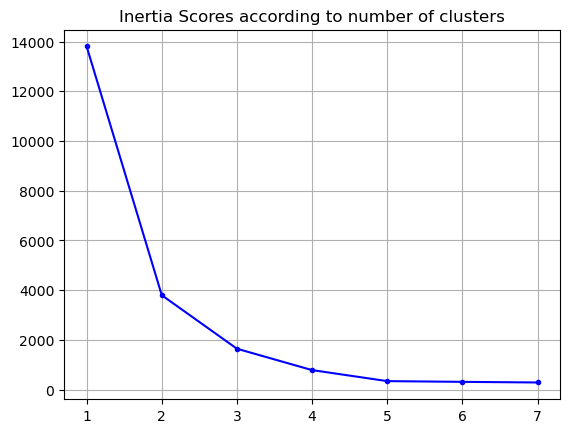

In [8]:
scores = cluster_inertia_qty(X, y, 1, 8)
plt.plot(range(1,8), scores, 'b.-')
plt.title("Inertia Scores according to number of clusters")
plt.grid()
plt.show()

In [9]:
def cluster_silhouette_qty(x, y, a, b):
    silhouette_scores = []
    for i in range(a,b):
        model = KMeans(n_clusters=i, random_state=42)
        model.fit(X)
        silhouette_scores.append(silhouette_score(X, model.labels_))
    return silhouette_scores

In [10]:
silhouette_score(X, kmeans.labels_)

0.7173642175642293

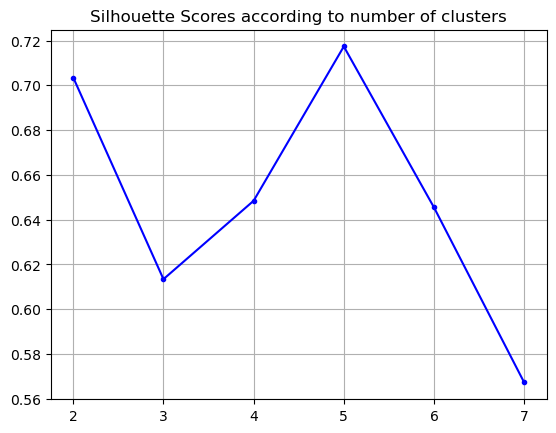

In [11]:
sil_scores = cluster_silhouette_qty(X, y, 2, 8)
plt.plot(range(2,8), sil_scores, 'b.-')
plt.title("Silhouette Scores according to number of clusters")
plt.grid()
plt.show()

## Image Segmentation

In [12]:
image = np.asarray(PIL.Image.open('/Users/juanpablorodriguez/Documents/Data Scientist Course/UnsupervisedLearning/flower-8177578_640.jpeg'))
image.shape

(640, 427, 3)

In [13]:
X = image.reshape(-1,3)

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)

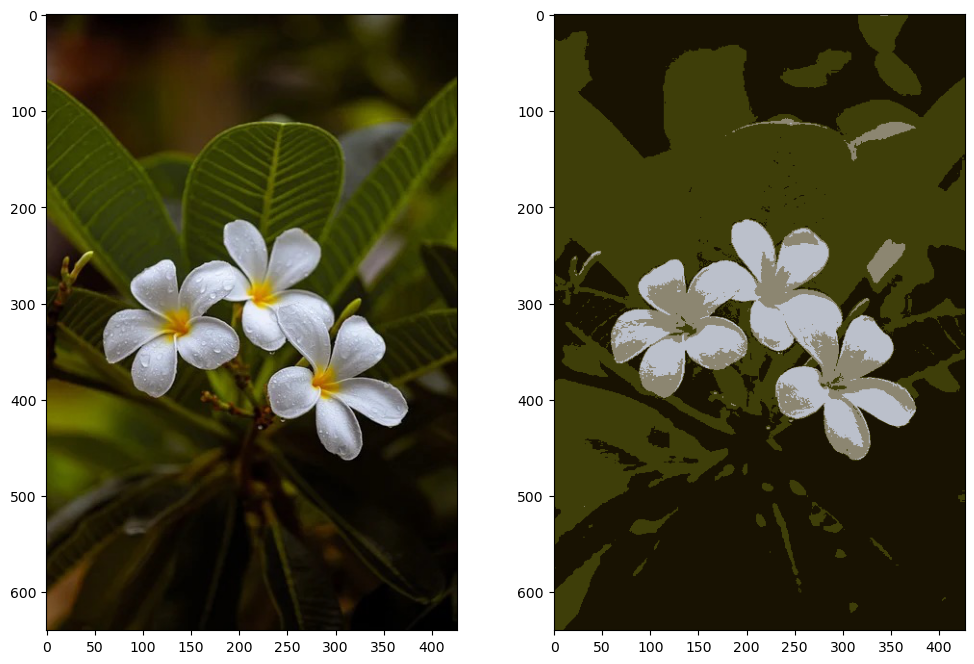

In [15]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(segmented_img/255)
plt.show()

Using Kmeans to select representative instances

In [16]:
X_digits, y_digits = load_digits(return_X_y = True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [17]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

0.7481108312342569

In [18]:
X_train[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
kmeans = KMeans(n_clusters=50, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
X_digits_dist

array([[53.8347602 , 41.42507119, 40.38645515, ..., 46.70298587,
        43.32913642, 41.73144964],
       [22.96665235, 50.3636375 , 45.70161035, ..., 48.27458499,
        43.06000537, 50.03512655],
       [29.42934195, 50.1412468 , 43.36356873, ..., 50.49457617,
        47.66591091, 53.60050269],
       ...,
       [49.57764931, 56.45575913, 36.34319282, ..., 46.91590586,
        54.17253975, 56.99134925],
       [49.46706914, 55.89670767, 33.61503416, ..., 46.99966903,
        53.61297942, 54.25569607],
       [38.3721188 , 43.90294928, 48.93405716, ..., 43.3609143 ,
        41.15263129, 37.04745455]])

In [20]:
X_digits_dist.shape

(1400, 50)

In [21]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

In [22]:
representative_digit_idx

array([1120,  708,  582,  925,  597,  384,  798,  970,  768,  815,  885,
       1387,  870,  141, 1084,   88, 1030,  310, 1312,  972,  410, 1168,
        213,  579,  612, 1315,  463, 1075, 1005,  199,  558,  613,  877,
       1352, 1327,  259, 1114,  652,  983,  115, 1328, 1050, 1336,  543,
        938, 1227,  881,  685,  345,  438])

In [23]:
X_representative_digits = X_train[representative_digit_idx]
y_representative_digits = y_train[representative_digit_idx]

In [24]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

### Propagate labels to the rest of the training set
This is useful when you only label a few of the instances

In [25]:
y_train_propagated = np.empty(len(X_train), dtype = np.int64)
for i in range(50):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [26]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8942065491183879

### Alternative

In [27]:
from sklearn.semi_supervised import LabelSpreading, LabelPropagation

## DBSCAN

In [29]:
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)

In [31]:
dbscan.fit(X)
dbscan.labels_[:10]

array([0, 5, 9, 0, 0, 4, 0, 1, 1, 2])

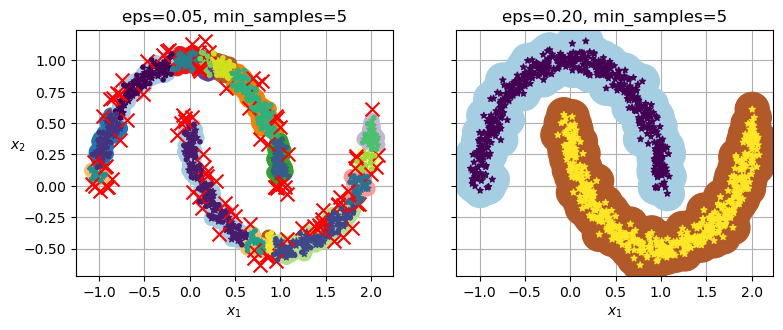

In [42]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [38]:
dbscan.components_

array([[-0.24363981,  1.00736941],
       [-0.4132311 ,  0.95810742],
       [-0.59823422,  0.74917692],
       ...,
       [-0.79525543,  0.45465748],
       [-0.27382973,  0.90159887],
       [-0.71760753,  0.68696664]])

### Predicting
dbscan does not have a predict method. We can choose a classification algorithm for this

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [55]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2,1]])
knn.predict(X_new)

/Users/juanpablorodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, 1])

In [56]:
knn.predict_proba(X_new)

array([[0.7, 0.3],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ]])